In [1]:
# importing the necessary packages

# packages used for training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd

# package used for POS-taggingh
from spacy.es import Spanish

# packages used for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# packages used for visualization
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# loads the text and labels
with open('../data/train/es.text') as f:
    esp_text = f.readlines()

with open('../data/train/es.labels') as f:
    esp_labels = f.readlines()

In [3]:
# asserts that the number of tweets and labels are equal
assert len(esp_text) == len(esp_labels)

In [4]:
esp_text = [tweet.strip() for tweet in esp_text]
esp_labels = [int(label.strip()) for label in esp_labels]

In [5]:
np.random.seed(42)
np.random.shuffle(esp_text)
np.random.seed(42)
np.random.shuffle(esp_labels)

## Raw counts

In [6]:
# pipeline used to gather counts of all words in the dataset and vectorizes each document using CountVectorizer;
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('count', CountVectorizer()),
                 ('clf', LinearSVC())])

In [7]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.23105754  0.229421    0.2301145   0.22734644  0.22318532]
Accuracy: 0.23 (+/- 0.01)


In [8]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[8427 2800  951 1335  819  696  395  328  418  533  314  374  410  224
   419  318  323  380  219]
 [3892 3642  956  641  698  427  247  311  349  440  270  256  244  204
   185  171  198  165  209]
 [1461 1036 3036  307  486  285  351  304  303  153  274  118  127  254
   120  137  174  103  224]
 [2786  849  292  737  278  244  105  123  145   92  112  133  128   61
   176  137  145  150   76]
 [1586 1004  521  288  816  269  258  211  243  192  171  108   85  142
   102  123   90   82  153]
 [1357  564  356  243  315  507  119  136  136   44   76   65   74   80
    77   53   66   54   65]
 [ 577  289  355  140  230   95 1220  148  134   77   87   62   54   87
    32   61   59   38   88]
 [ 689  416  466  156  301  150  188  357  148   76  106   51   52   99
    56   91  100   54   95]
 [ 840  477  300  153  251  119  150  121  385   97  138   57   52   66
    50   72   46   36   91]
 [ 628  327  112   62  119   36   82   46   61 1549   68   51   23   30
    25   59   35   17   40]


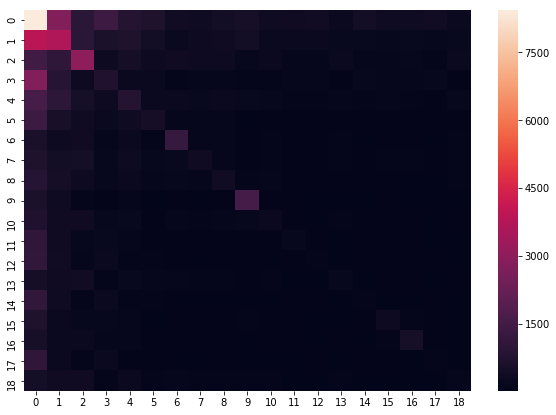

In [9]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [10]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.43      0.34     19683
          1       0.25      0.27      0.26     13505
          2       0.32      0.33      0.33      9253
          3       0.13      0.11      0.12      6769
          4       0.15      0.13      0.14      6444
          5       0.14      0.12      0.13      4387
          6       0.32      0.32      0.32      3833
          7       0.13      0.10      0.11      3651
          8       0.13      0.11      0.12      3501
          9       0.40      0.46      0.43      3370
         10       0.11      0.08      0.09      3125
         11       0.09      0.06      0.07      2907
         12       0.06      0.04      0.05      2786
         13       0.10      0.06      0.08      2694
         14       0.05      0.03      0.04      2613
         15       0.15      0.12      0.13      2537
         16       0.24      0.21      0.22      2583
         17       0.07      0.04      0.05   

## Feature normalization using tf-idf

In [11]:
# pipeline used to gather counts of all words in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC())])

In [12]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.25364668  0.2542931   0.25098794  0.24716197  0.24822587]
Accuracy: 0.25 (+/- 0.01)


In [13]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[9273 3042 1122 1182  737  556  394  272  335  614  264  258  269  158
   262  257  315  224  149]
 [4161 4184 1114  518  653  343  253  231  286  454  208  143  151  124
   125  131  199  102  125]
 [1458 1134 3750  242  413  219  357  259  222  149  185   80   76  162
    66   92  183   65  141]
 [3080  912  358  651  262  211  107  108  124  128   87   84   96   42
   115  107  137  101   59]
 [1699 1152  633  246  825  238  272  199  213  203  134   81   43  101
    63   96   92   42  112]
 [1492  625  445  218  297  508  126  106  110   50   57   36   44   58
    43   37   61   35   39]
 [ 590  297  446  108  207   71 1456  116  105   73   57   32   33   60
    20   45   45   20   52]
 [ 759  486  580  135  291  137  203  333  127   78   82   32   27   81
    38   71   95   31   65]
 [ 852  502  389  149  249  101  168   96  391  122  119   40   40   49
    44   52   43   28   67]
 [ 637  355  138   46  107   28   85   41   52 1632   58   32   11   19
    16   44   32    6   31]


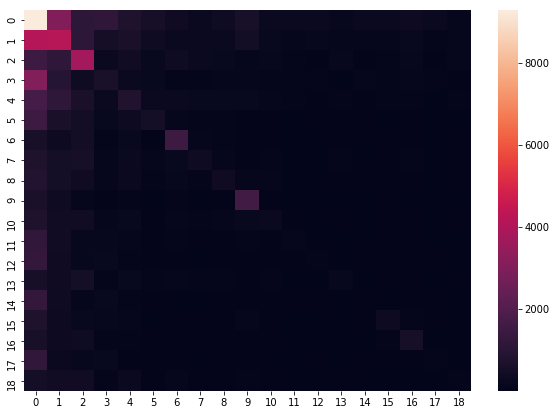

In [14]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [15]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.47      0.36     19683
          1       0.26      0.31      0.28     13505
          2       0.33      0.41      0.36      9253
          3       0.13      0.10      0.11      6769
          4       0.16      0.13      0.14      6444
          5       0.17      0.12      0.14      4387
          6       0.35      0.38      0.36      3833
          7       0.14      0.09      0.11      3651
          8       0.15      0.11      0.13      3501
          9       0.38      0.48      0.43      3370
         10       0.13      0.08      0.10      3125
         11       0.11      0.05      0.06      2907
         12       0.08      0.03      0.04      2786
         13       0.12      0.06      0.08      2694
         14       0.06      0.03      0.04      2613
         15       0.19      0.12      0.15      2537
         16       0.26      0.22      0.24      2583
         17       0.08      0.03      0.05   

## tf-idf and part-of-speech tagging

In [16]:
# loads the spaCy Spanish parser
parser = Spanish()

In [17]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [19]:
# pipeline used to gather counts of all words labeled with POS in the dataset normalized with tf-idf 
# and vectorizes each document using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize)),
                 ('clf', LinearSVC())])

In [20]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.3036872   0.30525303  0.30332354  0.29738496  0.29764801]
Accuracy: 0.30 (+/- 0.01)


In [21]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[11771  2309   696  1220   524   440   272   198   250   340   159   221
    206   109   229   216   237   176   110]
 [ 2154  5209  1215   733   804   446   293   229   317   610   244   186
    177   147   135   153   207   110   136]
 [  748  1390  4010   273   495   255   345   288   220   205   188    82
     58   160    65    90   175    59   147]
 [ 1913  1192   373  1045   318   259   157   115   159   162   121   125
    133    47   140   143   153   154    60]
 [  901  1447   666   329   955   289   285   216   223   276   134    81
     54   113    79   104   109    55   128]
 [  835   835   433   303   333   602   156   150   124    82    75    50
     63    66    73    42    69    53    43]
 [  331   383   422   159   229   103  1466   120   110    87    80    36
     39    67    23    47    43    27    61]
 [  432   591   629   168   296   169   211   352   127    92   104    46
     32    88    34    87   112    23    58]
 [  456   649   391   220   295   132   192   10

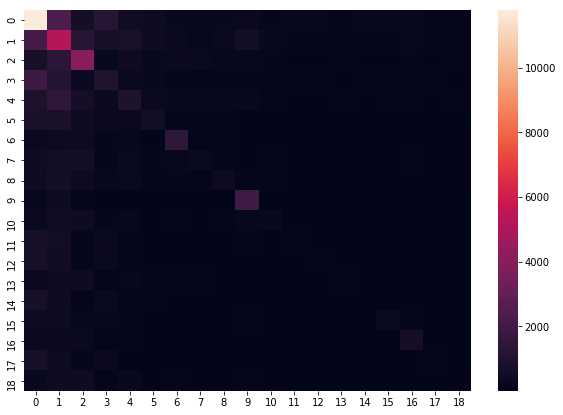

In [22]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [23]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.60      0.53     19683
          1       0.28      0.39      0.32     13505
          2       0.35      0.43      0.39      9253
          3       0.16      0.15      0.16      6769
          4       0.17      0.15      0.16      6444
          5       0.17      0.14      0.15      4387
          6       0.35      0.38      0.36      3833
          7       0.14      0.10      0.12      3651
          8       0.16      0.12      0.13      3501
          9       0.40      0.58      0.48      3370
         10       0.14      0.09      0.11      3125
         11       0.10      0.05      0.07      2907
         12       0.09      0.04      0.06      2786
         13       0.12      0.06      0.08      2694
         14       0.06      0.03      0.04      2613
         15       0.18      0.13      0.15      2537
         16       0.28      0.26      0.27      2583
         17       0.09      0.04      0.06   

## tf-idf and bi-grams

In [24]:
# pipeline used to gather counts of bi-grams in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [25]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.25931929  0.26721037  0.26704833  0.26221366  0.25968167]
Accuracy: 0.26 (+/- 0.01)


In [26]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[9134 3157 1085 1351  771  555  346  233  332  590  253  295  259  134
   263  254  287  263  121]
 [4113 4414 1133  556  668  340  261  168  270  460  182  139  121  104
   111  119  149   95  102]
 [1375 1106 4182  233  448  199  330  221  191  136  157   57   44  121
    53   71  159   39  131]
 [2949  947  313  789  268  201  114   84  132  112   74  101  106   29
   126  123  138  123   40]
 [1601 1208  648  270  957  258  244  187  192  185  110   64   57   91
    67   87   77   50   91]
 [1421  611  468  253  287  575  126  110  112   57   54   43   39   40
    46   37   53   28   27]
 [ 585  291  418  120  208   81 1490  126  112   70   73   27   26   45
    27   41   39   19   35]
 [ 736  511  664  123  300  135  196  359  113   68   69   36   15   64
    22   85   81   29   45]
 [ 799  565  366  184  275  107  172  107  418   92   98   33   34   40
    51   51   37   25   47]
 [ 566  343  127   61   84   20   78   41   26 1800   47   38   11   20
     7   40   26   16   19]


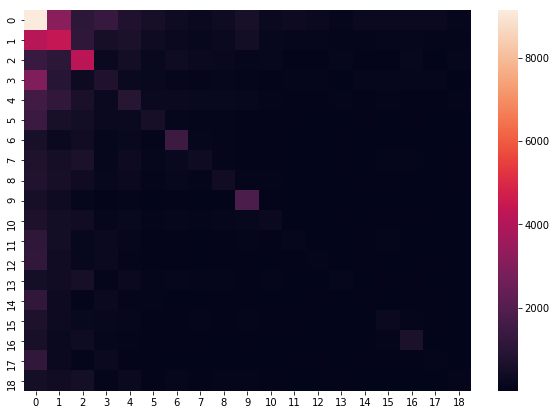

In [27]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [28]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.29      0.46      0.36     19683
          1       0.27      0.33      0.29     13505
          2       0.35      0.45      0.40      9253
          3       0.14      0.12      0.13      6769
          4       0.17      0.15      0.16      6444
          5       0.19      0.13      0.15      4387
          6       0.36      0.39      0.37      3833
          7       0.16      0.10      0.12      3651
          8       0.17      0.12      0.14      3501
          9       0.42      0.53      0.47      3370
         10       0.15      0.09      0.11      3125
         11       0.10      0.05      0.06      2907
         12       0.10      0.04      0.05      2786
         13       0.13      0.05      0.07      2694
         14       0.06      0.03      0.04      2613
         15       0.18      0.12      0.14      2537
         16       0.31      0.25      0.28      2583
         17       0.09      0.04      0.06   

## tf-idf, bi-grams and part-of-speech tagging

In [29]:
# loads the spaCy Spanish parser
parser = Spanish()

In [30]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [32]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [33]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text, esp_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.31072731  0.31163568  0.31578681  0.30797689  0.30950933]
Accuracy: 0.31 (+/- 0.01)


In [34]:
# Crossvalidates the performance of the above pipe on the Spanish data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,esp_text,esp_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels,y_pred)
print(conf_mat)

[[11831  2336   642  1313   543   449   221   163   220   270   170   239
    231   100   251   198   190   242    74]
 [ 2211  5446  1158   800   790   452   280   217   272   489   206   186
    157   132   165   147   165   118   114]
 [  779  1427  4173   265   536   248   320   248   173   161   187    78
     60   135    61    87   149    47   119]
 [ 1953  1187   297  1126   317   272   119    95   155   131   118   144
    143    40   185   141   151   149    46]
 [  896  1519   654   374  1034   282   248   220   197   237   131    78
     52    91    81   100    82    62   106]
 [  884   841   440   333   327   675   134   126   106    57    70    64
     54    37    62    38    62    42    35]
 [  378   391   377   147   222   103  1509   123    97    69    82    31
     35    50    37    51    48    30    53]
 [  426   604   647   186   347   160   212   352   110    81    93    40
     29    75    32    95    80    34    48]
 [  454   672   351   246   338   132   173   11

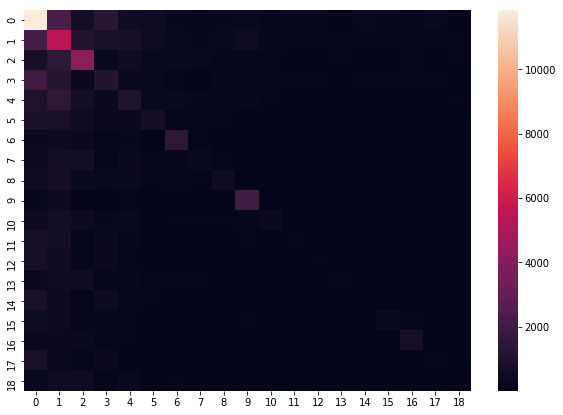

In [35]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [36]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels, y_pred))

             precision    recall  f1-score   support

          0       0.48      0.60      0.53     19683
          1       0.28      0.40      0.33     13505
          2       0.37      0.45      0.41      9253
          3       0.16      0.17      0.16      6769
          4       0.17      0.16      0.16      6444
          5       0.19      0.15      0.17      4387
          6       0.38      0.39      0.39      3833
          7       0.15      0.10      0.12      3651
          8       0.18      0.13      0.15      3501
          9       0.47      0.61      0.53      3370
         10       0.15      0.09      0.11      3125
         11       0.10      0.05      0.07      2907
         12       0.08      0.04      0.05      2786
         13       0.13      0.05      0.08      2694
         14       0.06      0.04      0.05      2613
         15       0.18      0.13      0.15      2537
         16       0.34      0.29      0.31      2583
         17       0.09      0.05      0.06   

## tf-idf, bi-grams and part-of-speech tagging with balanced dataset

In [37]:
# puts the English text and labels data into a pandas DataFrame
esp_data_df = pd.DataFrame([esp_text, esp_labels]).transpose()
esp_data_df.columns = (['text', 'label'])

In [38]:
# collects a random sample of each category based on the frequency of the least common set
# e.g. category 18 has 2508 items, so a sample of 2508 tweets from each category
esp_data_balanced = pd.concat([esp_data_df[esp_data_df.label == i].sample(2508) for i in range(0,19)])
esp_data_balanced

,text,label
36275,"Si de por sí era bonita, contigo ya... @ Mérid...",0
55584,Lo mejor de mi eres tu.. ️ @ Cambrils,0
61917,'Give'#Give #Love #Wonder #Back #BeYourself #E...,0
96857,"no hay mejor lugar @ La Manga, Murcia, Spain",0
30097,'Eres mis ganas de no estar con nadie más.'20 ...,0
58810,Con la prima más bonita @ Fuente Obejuna y sus...,0
38774,Buenas noches @ Sierra De San Cristobal,0
9973,Mi granaína favorita ️ @ Royal Palace of Madrid,0
11982,paseando con la hermosa de mi tia #begues #cat...,0
69191,️ ️ ️Pancakes de avena ️ ️ ️ El desayuno es la...,0


In [39]:
# takes the data from the eng_data_balanced DataFrame and converts the text/labels into Python arrays
esp_text_balanced = esp_data_balanced['text'].tolist()
esp_labels_balanced = esp_data_balanced['label'].tolist()

In [40]:
# asserts that the number of tweets and labels are equal
assert len(esp_text_balanced) == len(esp_labels_balanced)

In [41]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(esp_text_balanced)
np.random.seed(42)
np.random.shuffle(esp_labels_balanced)

In [42]:
# loads the spaCy Spanish parser
parser = Spanish()

In [43]:
# tokenizes an input tweet using the spaCy Spanish parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [45]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Linear Support Vector Machines
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', LinearSVC())])

In [46]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, esp_text_balanced, esp_labels_balanced, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.214091    0.21608304  0.21042147  0.21199706  0.21126169]
Accuracy: 0.21 (+/- 0.00)


In [47]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
y_pred = cross_val_predict(pipe,esp_text_balanced,esp_labels_balanced,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(esp_labels_balanced,y_pred)
print(conf_mat)

[[1023   93   34  126   61  132   45   58   65   66   49  116  116   51
   138   67   78  144   46]
 [  79  264  125  138  153  171   89   91  117  166  137  144  110  133
   125   95  115  113  143]
 [  37  126  529   49  103  146  139  192   86   78  133   71   75  225
    68   62  165   54  170]
 [  95  133   54  299   76  158   60   79  104   79   90  154  211   42
   291  158  121  245   59]
 [  42  140  112  108  263  193  146  154  155  149  119   90   80  149
   116  114  107   80  191]
 [  61  115  113  157  121  559  108  117  106   63   83  106  128  124
   154   76   87  133   97]
 [  28   59   81   65   93   95  994  135  121   61  108   78   56  108
    73   94   90   58  111]
 [  22   94  180   81  155  158  187  327  144  106  126   81   73  175
    82  141  163   66  147]
 [  48   85   89  116  141  129  155  146  414  109  164  110   98  134
   123  143   87   76  141]
 [  18   62   30   33   56   28   67   54   46 1669   98   52   29   47
    25   64   35   38   57]


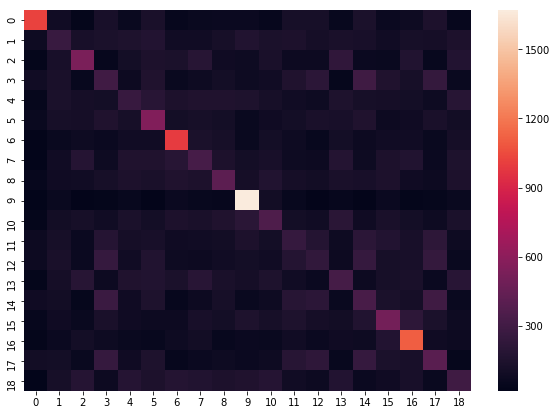

In [48]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(esp_labels)], columns = [i for i in set(esp_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [49]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(esp_labels_balanced, y_pred))

             precision    recall  f1-score   support

          0       0.52      0.41      0.46      2508
          1       0.13      0.11      0.11      2508
          2       0.24      0.21      0.22      2508
          3       0.12      0.12      0.12      2508
          4       0.12      0.10      0.11      2508
          5       0.19      0.22      0.21      2508
          6       0.35      0.40      0.37      2508
          7       0.14      0.13      0.13      2508
          8       0.18      0.17      0.17      2508
          9       0.46      0.67      0.55      2508
         10       0.15      0.14      0.15      2508
         11       0.11      0.10      0.10      2508
         12       0.11      0.09      0.10      2508
         13       0.14      0.13      0.13      2508
         14       0.12      0.13      0.13      2508
         15       0.19      0.20      0.20      2508
         16       0.34      0.44      0.39      2508
         17       0.15      0.16      0.16   